In [2]:
import pandas
dfAll = pandas.read_csv("okcupid_profiles.csv")
dfAll.shape
dfAll.describe()

,age,height,income
count,59946.000000,59943.000000,59946.000000
mean,32.340290,68.295281,20033.222534
std,9.452779,3.994803,97346.192104
min,18.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


In [3]:
dfAll = dfAll.query( "height >= 24")
dfAll = dfAll.query( "income >= 0")
dfAll.describe()

,age,height,income
count,11502.000000,11502.000000,11502.000000
mean,32.468179,69.114589,104319.248826
std,9.747387,3.913451,201277.724419
min,18.000000,26.000000,20000.000000
25%,25.000000,67.000000,20000.000000
50%,30.000000,69.000000,50000.000000
75%,37.000000,72.000000,100000.000000
max,69.000000,95.000000,1000000.000000


In [10]:
df = dfAll.sample(n=1000)
df.shape

(1000, 31)

In [11]:
df.isna().sum()

age              0
status           0
sex              0
orientation      0
body_type       46
diet           353
drinks          18
drugs          166
education       62
ethnicity       73
height           0
income           0
job             22
last_online      0
location         0
offspring      512
pets           243
religion       217
sign           120
smokes          42
speaks           0
essay0          85
essay1         115
essay2         137
essay3         166
essay4         180
essay5         165
essay6         215
essay7         188
essay8         280
essay9         189
dtype: int64

In [12]:
df = df.dropna( subset=["essay0"] )

In [13]:
df.essay0

59767    * under construction *  -martial arts -partyin...
35752    i am a loving person who enjoys the adventures...
14404    okcupid is like shopping at your local vintage...
38484    new to this, hoping i can meet awesome people ...
9189     hey everyone! after a few years of roaming aro...
                               ...                        
38805    smart, adventurous, sexy, well traveled lover ...
95       i'm new to sf from boston and thought this mig...
20472    without sounding too generic i hope; i find wr...
12000    i'm focused on my career and being secure and ...
44419             nerd with a fun streak/ general dabbler.
Name: essay0, Length: 915, dtype: object

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
tf_vectorizer = CountVectorizer( max_features=1000, stop_words="english" )
tfEssay0 = tf_vectorizer.fit_transform( df.essay0 )

In [15]:
from sklearn.decomposition import LatentDirichletAllocation
modelLda = LatentDirichletAllocation( n_components=10, n_jobs=-1 )
matrixLda = modelLda.fit_transform( tfEssay0 )

In [16]:
print( matrixLda[ 1:5, ].round( 2 ) )

[[0.   0.   0.   0.   0.   0.   0.   0.26 0.71 0.  ]
 [0.   0.   0.   0.   0.15 0.   0.   0.29 0.31 0.24]
 [0.01 0.01 0.01 0.89 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.45 0.   0.   0.   0.27 0.   0.   0.27 0.   0.  ]]


In [17]:
df.essay0[ matrixLda[:,0] > 0.98 ]

39273    i love traveling and adventure. i really like ...
5418     neither moth nor flame. love books and reading...
20362    i'm a unique guy with an interesting combinati...
17329    i'm a artist, i love the outdoors whether they...
52546    my name is mason; i am 21, and a guy. here's e...
38464    my favorite color is teal i like country, pop,...
31803    i'm a silly, smart, big hearted, laid back. i ...
Name: essay0, dtype: object

In [23]:
import matplotlib
from matplotlib import pyplot
def displayTopWords( model, feature_names, n_top_words, title ):
    fig, axes = matplotlib.pyplot.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]
        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"{title} {topic_idx +1}" )
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major" )
    matplotlib.pyplot.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    matplotlib.pyplot.show()

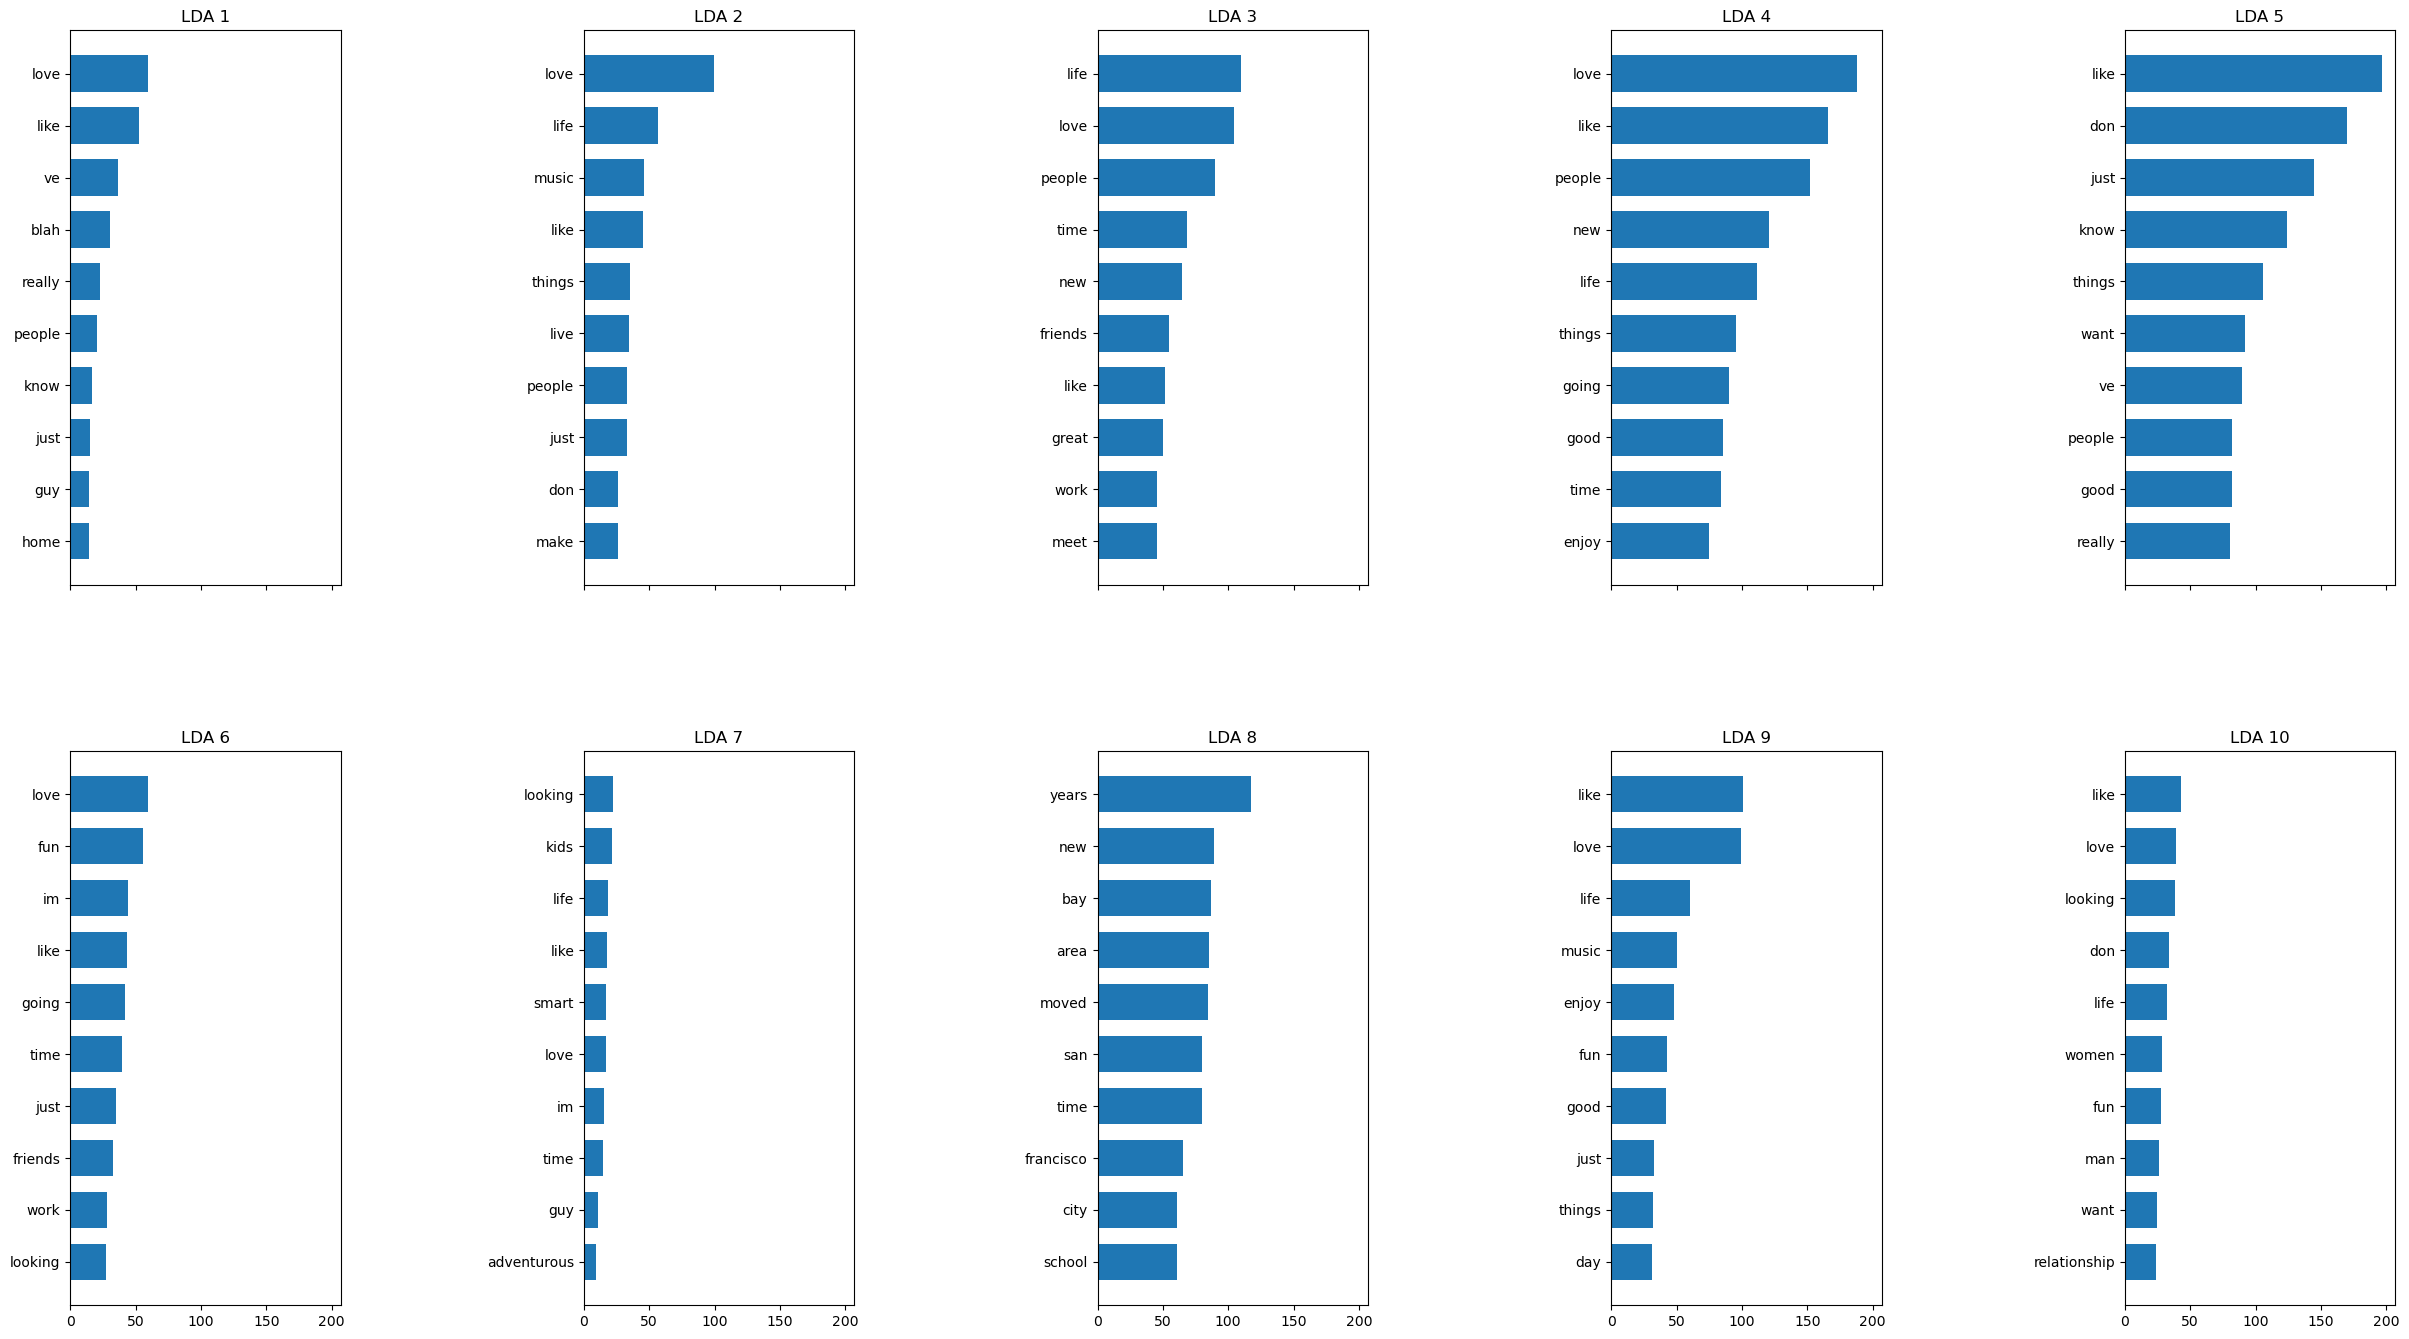

In [24]:
displayTopWords( modelLda, tf_vectorizer.get_feature_names_out(), 10, "LDA" )

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer( max_features=1000, stop_words="english" )
tfidfEssay0 = tfidf_vectorizer.fit_transform( df.essay0 )

In [26]:
from sklearn.decomposition import NMF
modelMnf = NMF( n_components=10, max_iter=1000 )
matrixMnf = modelMnf.fit_transform( tfidfEssay0 )

In [27]:
print( matrixMnf[ 1:5, ].round( 3 ) )

[[0.    0.12  0.089 0.    0.003 0.099 0.059 0.    0.036 0.   ]
 [0.007 0.    0.04  0.023 0.    0.129 0.    0.016 0.084 0.   ]
 [0.022 0.    0.    0.182 0.002 0.    0.    0.001 0.    0.   ]
 [0.088 0.003 0.041 0.    0.    0.023 0.    0.116 0.096 0.   ]]


In [28]:
df.essay0[ matrixMnf[:,0] > 0.11 ]

40714    i'm randal, an import from manchester/england ...
24098    i just moved here from the east coast for a ne...
28553    i'm a nerd/geek...but i don't look it so i've ...
7538     okay, where to start? what do i put here that ...
18349    fyi: this profile is under slight work. mostly...
19970    i'm a bay area native. growing up, i used to d...
50709    edit (4/23): i'm getting more and more cynical...
26017    originally from ohio so i appreciate all the g...
11651    i try to do what's best, don't beat myself up ...
23318    i'd describe my self as nice, easy going, some...
37357    i'm laid back. i am healthy and go to the gym ...
7103     well, if you made it this far, you've not doub...
16233    i'm a bit of a wanderer -- i'm from a small to...
14084    hello hello! i'll do my best to describe mysel...
19852    my path has not been linear but i'm pretty hap...
20025    what sets me apart from other girls? pft! that...
59254    the worst part about writing one of these is t.

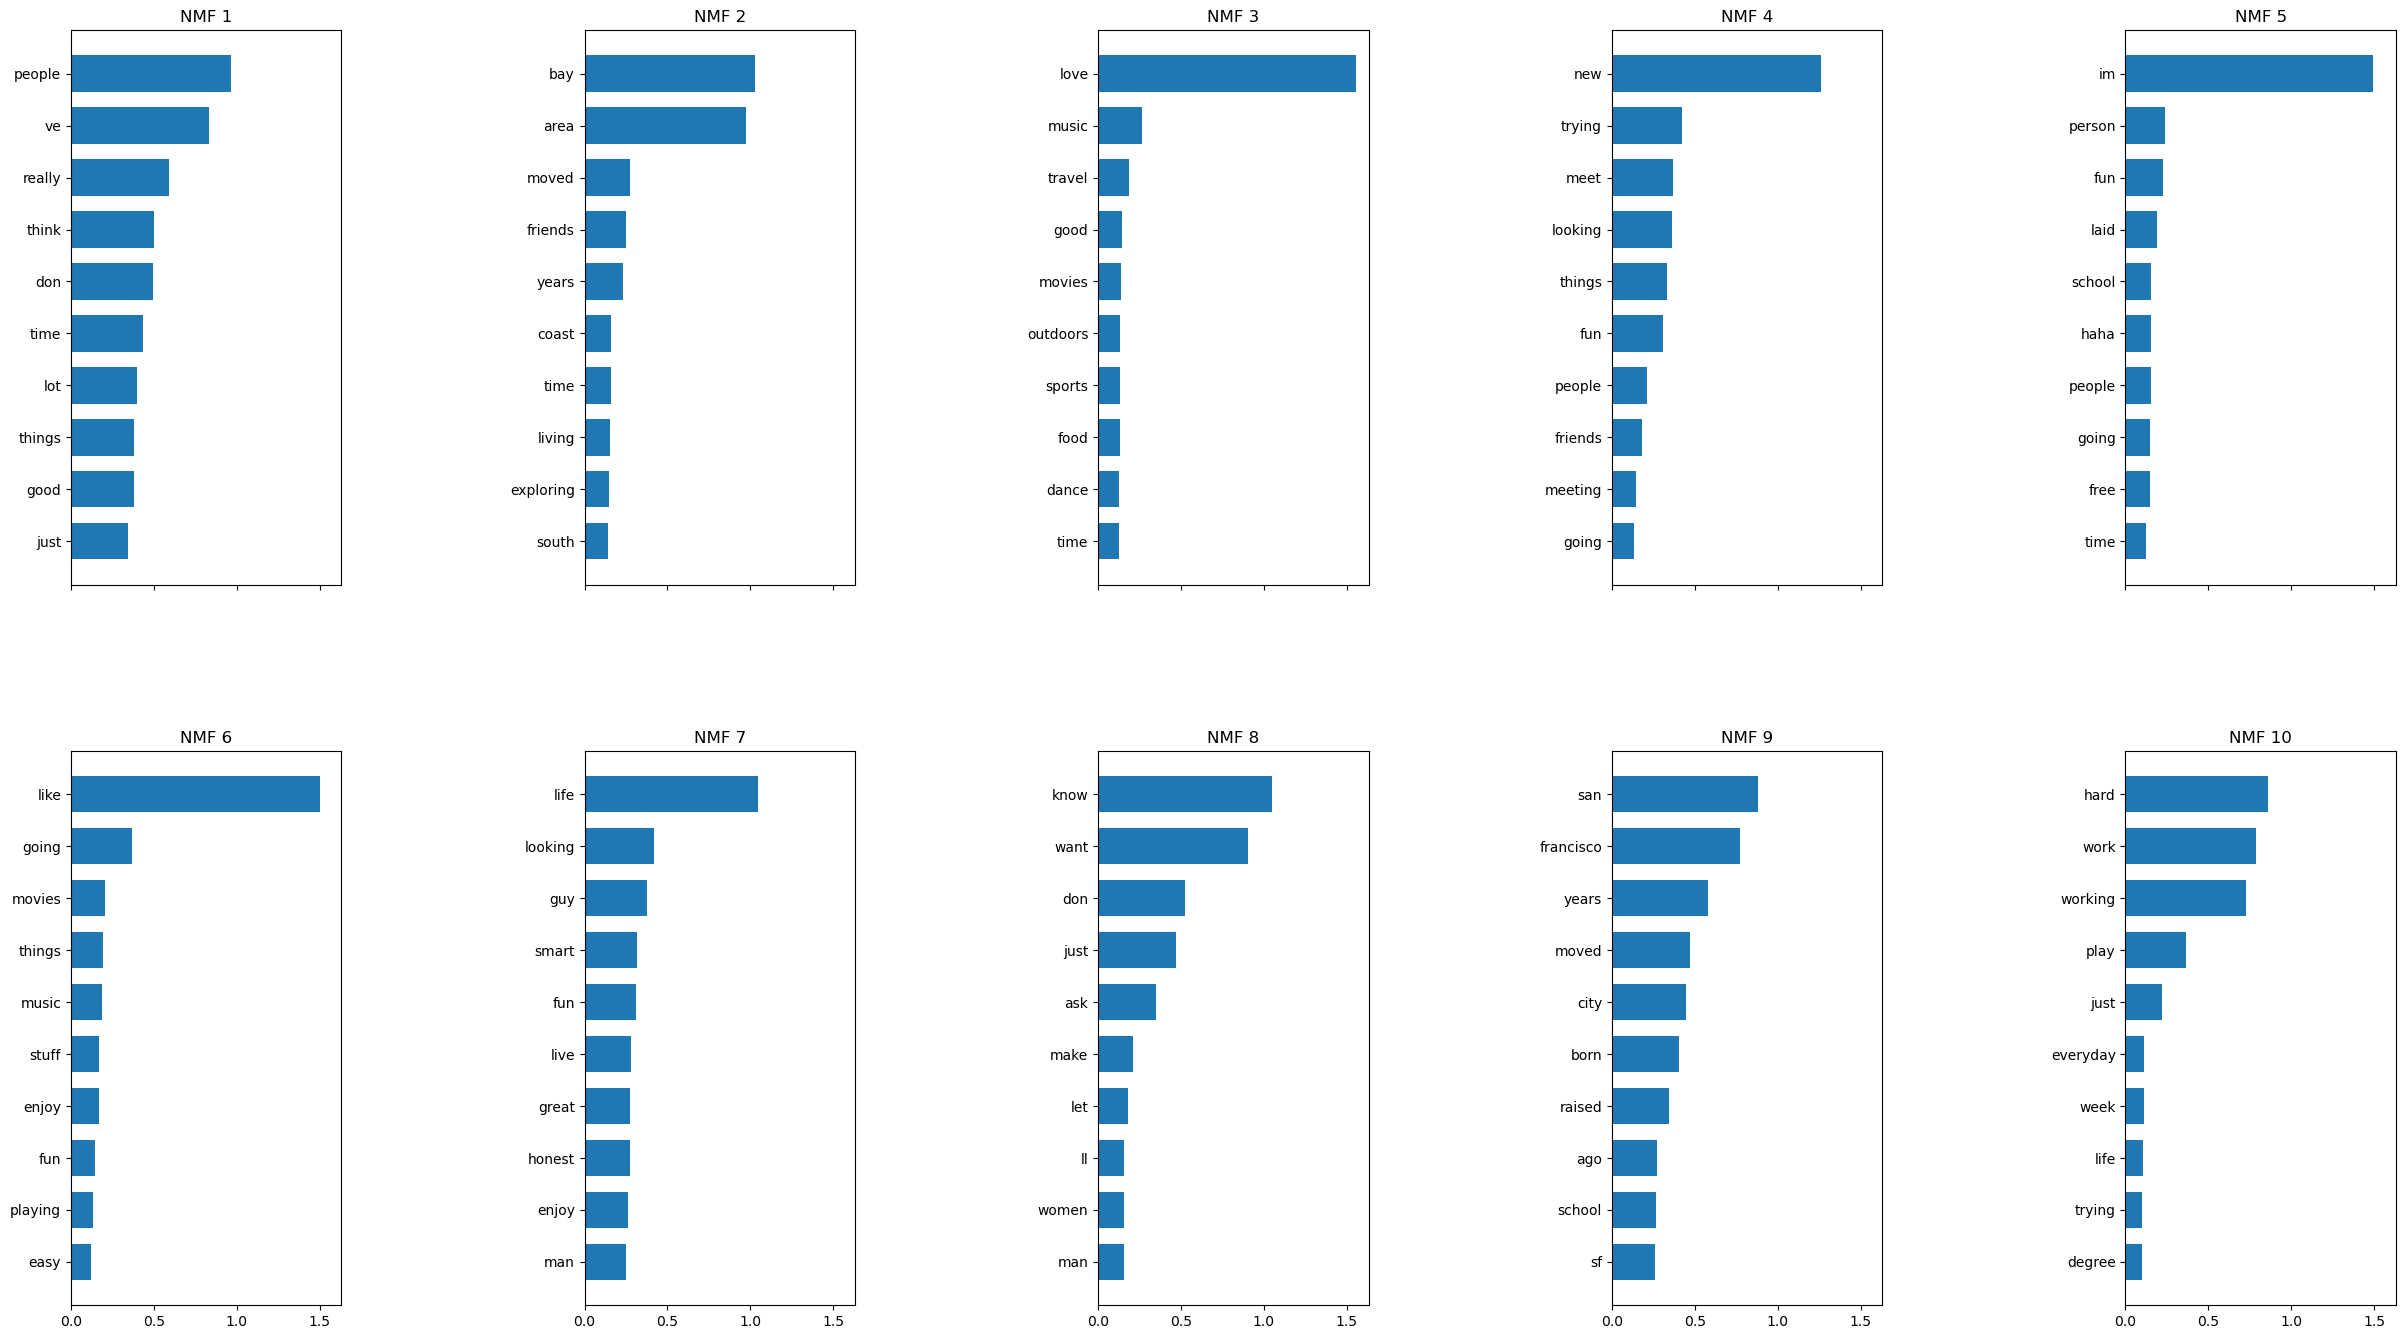

In [29]:
displayTopWords( modelMnf, tfidf_vectorizer.get_feature_names_out(), 10, "NMF" )

In [30]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Ahern\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [31]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
df['sentiment'] = [sia.polarity_scores(x)['compound'] for x in df['essay0']]

In [32]:
import numpy
rng = numpy.random.RandomState( 28 )
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( df, df.age, random_state=rng, test_size=0.5 )

In [33]:
lstNum = [ 'height', 'income', 'sentiment' ]
lstCat = [ 'status', 'sex', 'orientation', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'job', 'offspring', 'pets', 'religion', 'sign', 'smokes']

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
pipeNum = Pipeline( [
    ("selector", ColumnTransformer([ ("selector", "passthrough", lstNum ) ] )),
    ('scaler', StandardScaler() )
    ])
from sklearn.preprocessing import OneHotEncoder
pipeCat = Pipeline([
    ('selector', ColumnTransformer([ ("selector", "passthrough", lstCat ) ] )),
    ('encoder', OneHotEncoder( dtype=int, drop="first", handle_unknown='ignore' ) )
    ])

In [35]:
from sklearn.pipeline import FeatureUnion
preprocessorBase = FeatureUnion([
    ('cat', pipeCat ),
    ('num', pipeNum )
    ])

In [36]:
from xgboost import XGBRegressor
pipeBase = Pipeline([
    ('preprocessor', preprocessorBase ),
    ('model', XGBRegressor() )
    ])

C:\Users\Ahern\miniconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [37]:
pipeBase.fit( X_train, y_train )
import sklearn.metrics
predTestBase = pipeBase.predict( X_test )
sklearn.metrics.r2_score( y_test, predTestBase )

C:\Users\Ahern\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [3, 4, 7, 9, 10, 11, 12] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


0.24070170542462177

In [38]:
pipeTextLda = Pipeline([
    ('selector', ColumnTransformer([ ("selector",
    CountVectorizer( max_features=1000, stop_words="english" ),
    'essay0' ) ] ) ),
    ('topic', LatentDirichletAllocation( n_components=10 ) ),
    ])
preprocessorLda = FeatureUnion([
    ('cat', pipeCat ),
    ('text', pipeTextLda ),
    ('num', pipeNum )
    ])
pipeLda = Pipeline([
    ('preprocessor', preprocessorLda ),
    ('model', XGBRegressor() )
    ])

In [39]:
pipeLda.fit( X_train, y_train )
predTestLda = pipeLda.predict( X_test )
sklearn.metrics.r2_score( y_test, predTestLda )

C:\Users\Ahern\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [3, 4, 7, 9, 10, 11, 12] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


0.3107485037107478

In [40]:
pipeTextNmf = Pipeline([
    ('selector', ColumnTransformer([ ("selector",
    TfidfVectorizer( max_features=1000, stop_words="english" ),
    'essay0' ) ] ) ),
    ('topic', NMF( n_components=10, max_iter=2000 ) ),
    ])
preprocessorNmf = FeatureUnion([
    ('cat', pipeCat ),
    ('text', pipeTextNmf ),
    ('num', pipeNum )
    ])
pipeNmf = Pipeline([
    ('preprocessor', preprocessorNmf ),
    ('model', XGBRegressor() )
    ])

In [41]:
pipeLda.fit( X_train, y_train )
predTestLda = pipeLda.predict( X_test )
sklearn.metrics.r2_score( y_test, predTestLda )

C:\Users\Ahern\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [3, 4, 7, 9, 10, 11, 12] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


0.2286353295577842